# **Churn Prediction 'Die ZEIT' - Logistic Regression**

#### **Pls install following packaged to your VE**

**balancing:** <br/>
conda install -c conda-forge imbalanced-learn <br/>
**Xgboost classifierXgboost classifier:** <br/>
conda install -c conda-forge xgboost <br/>

### **Used Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Library for timing
from time import time

# Ignore warnings while plotting
import warnings
warnings.filterwarnings("ignore")

# Feature Engineering & Selection modules
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# SUPERVISED LEARNING
# Libraries for classification issues
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Libraries for classification and regression issues
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Libraries for splitting data, hyperparameter tuning & Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Librarie for data balancing
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler

# Libraries for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

# Display the whole content of the data frame
pd.set_option('display.max_columns', None)   # Displays all columns
pd.set_option('display.max_rows', None)      # Displays all rows

# Define decimal places shown in the notebook
pd.options.display.float_format = '{:,.2f}'.format

# Visualization
%matplotlib inline
sns.set_style('whitegrid')

### **Read Data**

In [2]:
df = pd.read_csv('/Users/michaelleder/neuefische/capstone-ZEIT-2020-ds/00_data/f_chtr_churn_traintable_nf.csv')

In [3]:
df.head(1)

,Unnamed: 0,auftrag_new_id,liefer_beginn_evt,kanal,objekt_name,aboform_name,zahlung_rhythmus_name,lesedauer,rechnungsmonat,zahlung_weg_name,studentenabo,plz_1,plz_2,plz_3,ort,metropole,land_iso_code,shop_kauf,unterbrechung,anrede,titel,avg_churn,email_am_kunden,zon_che_opt_in,zon_sit_opt_in,zon_zp_grey,zon_premium,zon_boa,zon_kommentar,zon_sonstige,zon_zp_red,zon_rawr,zon_community,zon_app_sonstige,zon_schach,zon_blog_kommentare,zon_quiz,cnt_abo,cnt_abo_diezeit,cnt_abo_diezeit_digital,cnt_abo_magazin,cnt_umwandlungsstatus2_dkey,abo_registrierung_min,nl_zeitbrief,nl_zeitshop,nl_zeitverlag_hamburg,nl_fdz_organisch,nl_blacklist_sum,nl_bounced_sum,nl_aktivitaet,nl_registrierung_min,nl_sperrliste_sum,nl_opt_in_sum,boa_reg,che_reg,sit_reg,sso_reg,received_anzahl_1w,received_anzahl_1m,received_anzahl_3m,received_anzahl_6m,opened_anzahl_1w,opened_anzahl_1m,opened_anzahl_3m,openedanzahl_6m,clicked_anzahl_1w,clicked_anzahl_1m,clicked_anzahl_3m,clicked_anzahl_6m,unsubscribed_anzahl_1w,unsubscribed_anzahl_1m,unsubscribed_anzahl_3m,unsubscribed_anzahl_6m,openrate_1w,clickrate_1w,openrate_1m,clickrate_1m,openrate_3m,clickrate_3m,received_anzahl_bestandskunden_1w,received_anzahl_bestandskunden_1m,received_anzahl_bestandskunden_3m,received_anzahl_bestandskunden_6m,opened_anzahl_bestandskunden_1w,opened_anzahl_bestandskunden_1m,opened_anzahl_bestandskunden_3m,openedanzahl_bestandskunden_6m,clicked_anzahl_bestandskunden_1w,clicked_anzahl_bestandskunden_1m,clicked_anzahl_bestandskunden_3m,clicked_anzahl_bestandskunden_6m,unsubscribed_anzahl_bestandskunden_1w,unsubscribed_anzahl_bestandskunden_1m,unsubscribed_anzahl_bestandskunden_3m,unsubscribed_anzahl_bestandskunden_6m,openrate_bestandskunden_1w,clickrate_bestandskunden_1w,openrate_bestandskunden_1m,clickrate_bestandskunden_1m,openrate_bestandskunden_3m,clickrate_bestandskunden_3m,received_anzahl_produktnews_1w,received_anzahl_produktnews_1m,received_anzahl_produktnews_3m,received_anzahl_produktnews_6m,opened_anzahl_produktnews_1w,opened_anzahl_produktnews_1m,opened_anzahl_produktnews_3m,openedanzahl_produktnews_6m,clicked_anzahl_produktnews_1w,clicked_anzahl_produktnews_1m,clicked_anzahl_produktnews_3m,clicked_anzahl_produktnews_6m,unsubscribed_anzahl_produktnews_1w,unsubscribed_anzahl_produktnews_1m,unsubscribed_anzahl_produktnews_3m,unsubscribed_anzahl_produktnews_6m,openrate_produktnews_1w,clickrate_produktnews_1w,openrate_produktnews_1m,clickrate_produktnews_1m,openrate_produktnews_3m,clickrate_produktnews_3m,received_anzahl_hamburg_1w,received_anzahl_hamburg_1m,received_anzahl_hamburg_3m,received_anzahl_hamburg_6m,opened_anzahl_hamburg_1w,opened_anzahl_hamburg_1m,opened_anzahl_hamburg_3m,openedanzahl_hamburg_6m,clicked_anzahl_hamburg_1w,clicked_anzahl_hamburg_1m,clicked_anzahl_hamburg_3m,clicked_anzahl_hamburg_6m,unsubscribed_anzahl_hamburg_1w,unsubscribed_anzahl_hamburg_1m,unsubscribed_anzahl_hamburg_3m,unsubscribed_anzahl_hamburg_6m,openrate_hamburg_1w,clickrate_hamburg_1w,openrate_hamburg_1m,clickrate_hamburg_1m,openrate_hamburg_3m,clickrate_hamburg_3m,received_anzahl_zeitbrief_1w,received_anzahl_zeitbrief_1m,received_anzahl_zeitbrief_3m,received_anzahl_zeitbrief_6m,opened_anzahl_zeitbrief_1w,opened_anzahl_zeitbrief_1m,opened_anzahl_zeitbrief_3m,openedanzahl_zeitbrief_6m,clicked_anzahl_zeitbrief_1w,clicked_anzahl_zeitbrief_1m,clicked_anzahl_zeitbrief_3m,clicked_anzahl_zeitbrief_6m,unsubscribed_anzahl_zeitbrief_1w,unsubscribed_anzahl_zeitbrief_1m,unsubscribed_anzahl_zeitbrief_3m,unsubscribed_anzahl_zeitbrief_6m,openrate_zeitbrief_1w,clickrate_zeitbrief_1w,openrate_zeitbrief_1m,clickrate_zeitbrief_1m,openrate_zeitbrief_3m,clickrate_zeitbrief_3m,training_set,kuendigungs_eingangs_datum,churn,date_x
0,0,6BE5B590-07EA-4543-B422-F7ABB2AF9464,2013-10-02,andere,ZEIT Digital,Probeabo,jährlich,68,0,Bankeinzug,0,6,64,647,Erbach,0,DE,4,0,Frau,akademischer Titel,0.13,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,0,2,2,2005-01-27 07:53:59,2,2,0,0,0,1,14,2005-09-30 00:00:00,0,0,0,0,0,1,6,14,43,80,4,15,38,74,1,

### **Data insight**
#### **Overview**

In [4]:
# Numeric and categorical features
shape_init_rows = df.shape[0]
shape_init_cols = df.shape[1]

print('The shape of the data set: {0} rows, {1} columns'.format(shape_init_rows, shape_init_cols))
print('   ')

cont_f = df.select_dtypes(include=['float64', 'int64'])
print('The number of numeric features: {0}'.format(len(cont_f.columns)))

cat_f = df.select_dtypes(include="object")
print('The number of objectlike features: {0}'.format(len(cat_f.columns)))

The shape of the data set: 209043 rows, 171 columns
   
The number of numeric features: 153
The number of objectlike features: 18


#### **Correlations**

(-1.0, 1.0)

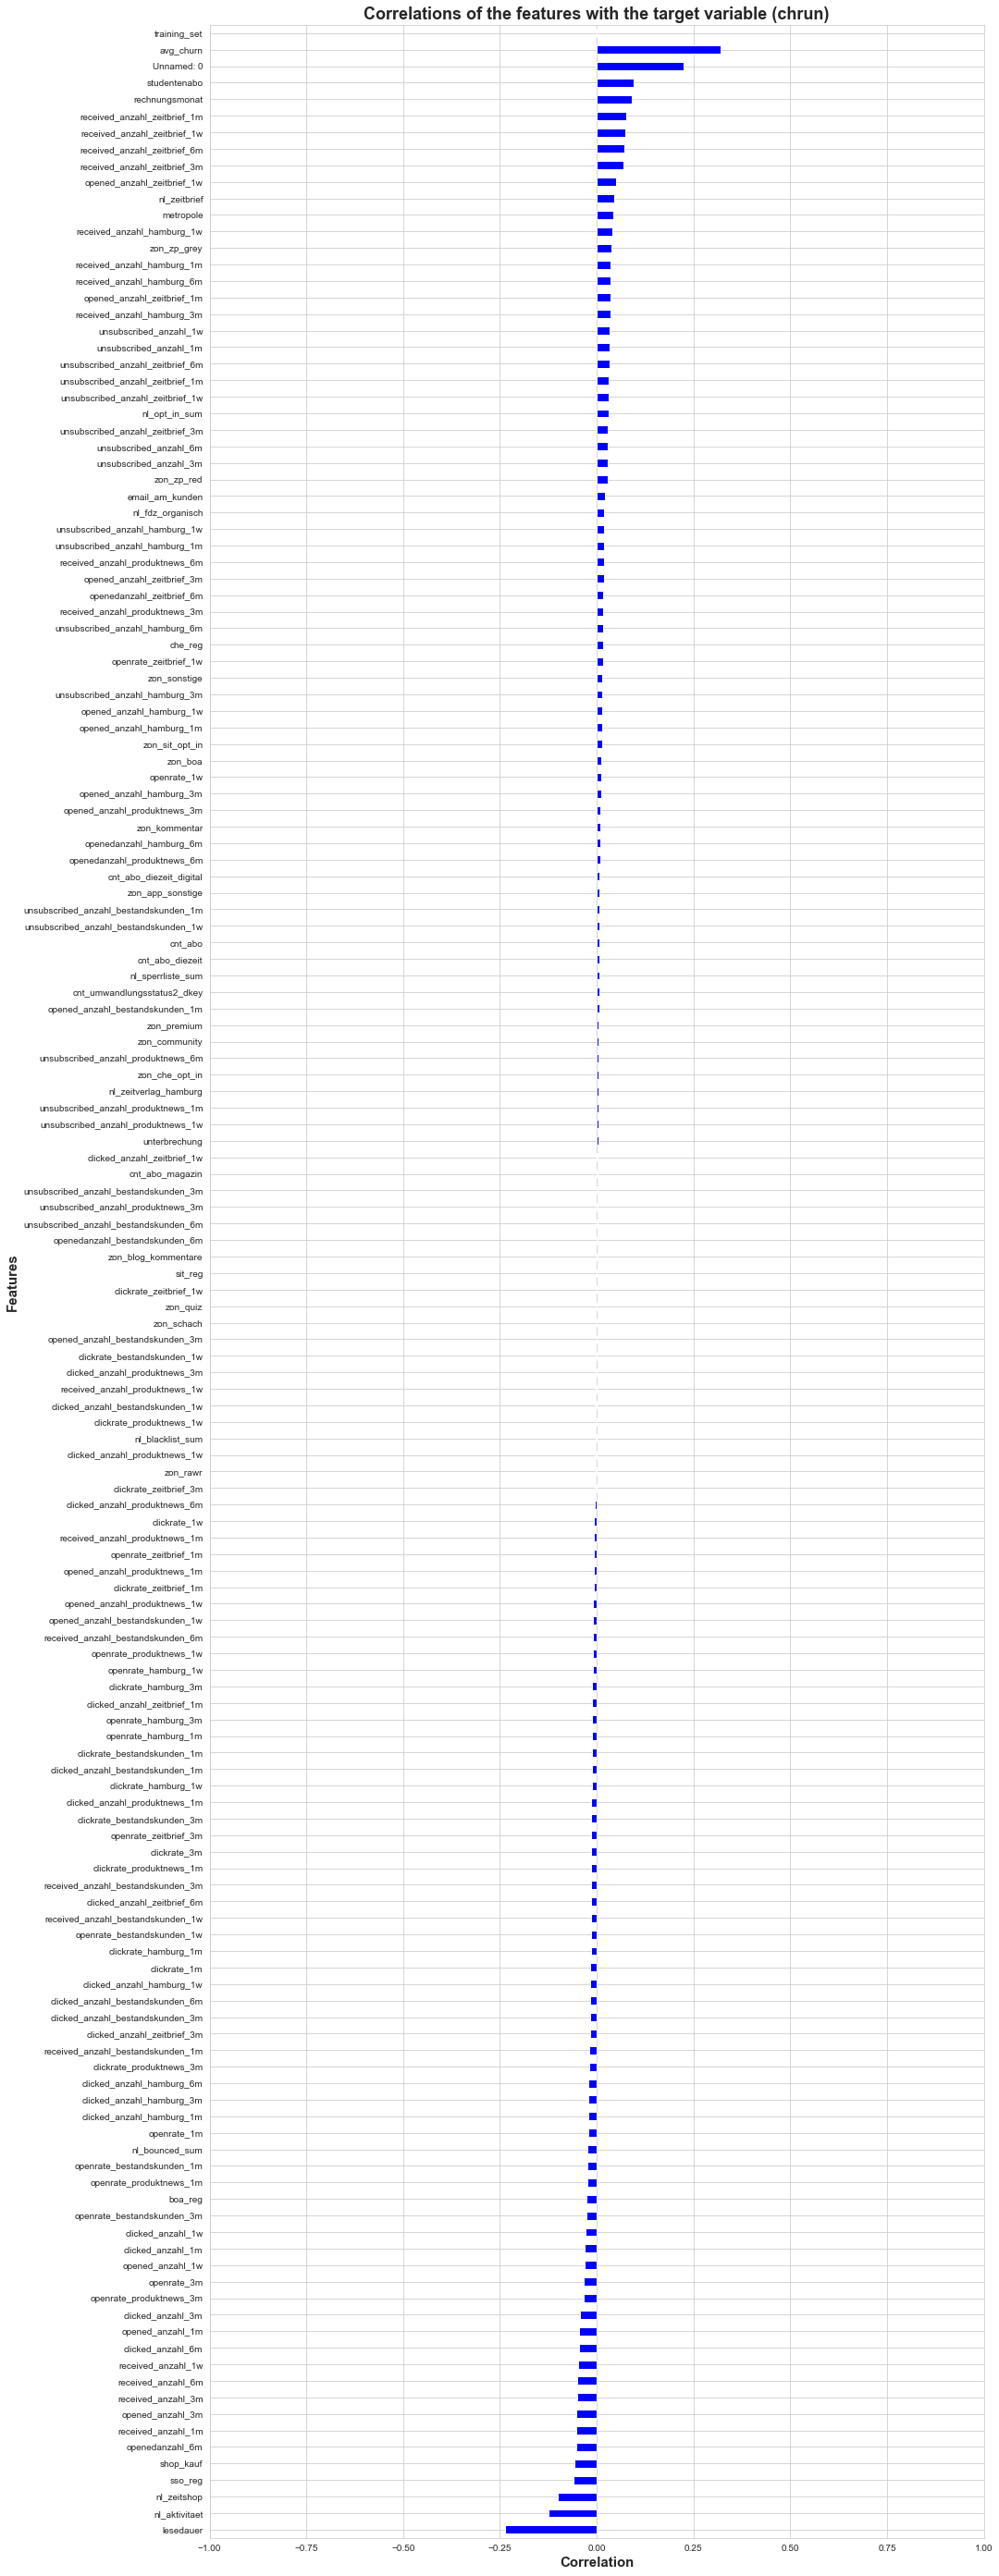

In [5]:
# Visualize correlations with target variable
df.drop('churn', axis=1).corrwith(df.churn).sort_values().plot(kind='barh', color='b', figsize=(15, 50));
plt.title('Correlations of the features with the target variable (chrun)', fontsize=(18), fontweight='bold')
plt.ylabel('Features', fontsize=(15), fontweight='bold')
plt.xlabel('Correlation', fontsize=(15), fontweight='bold')
plt.xlim(-1, 1)

## **1 - Data Preprocessing for Modeling**
### **Drop Irrelevant Features**

In [6]:
df.drop(columns=['Unnamed: 0',
                 'auftrag_new_id',
                 'kuendigungs_eingangs_datum',
                 'avg_churn',
                 'training_set'], inplace=True)

### **Drop Redundant Features**

In [7]:
df.drop(columns=['ort',
                 'plz_1',
                 'plz_2'], inplace=True)

### **Dealing with Missing Values**

In [8]:
df.isna().sum().sort_values().tail()

opened_anzahl_3m       0
openedanzahl_6m        0
received_anzahl_1w     0
date_x                 0
email_am_kunden       12
dtype: int64

In [9]:
df.dropna(subset=['email_am_kunden'], inplace=True)

In [10]:
# Numeric and categorical features
shape_a_nan_rows = df.shape[0]
shape_a_nan_cols = df.shape[1]


print('The shape of the data set (after dealing with missing values): {0} rows, {1} columns'.format(shape_a_nan_rows, shape_a_nan_cols))
print('   ')
print('By dropping the rows containing missing values, we removed {0} % of the rows \n(compared to the inital data set).'
      .format(round(((shape_init_rows-shape_a_nan_rows)/shape_init_rows)*100, ndigits=3)))

The shape of the data set (after dealing with missing values): 209031 rows, 163 columns
   
By dropping the rows containing missing values, we removed 0.006 % of the rows 
(compared to the inital data set).


### **Summary Preprocessing**

In [11]:
# Numeric and categorical features
print('The shape of the data set (after dropping columns and removing missing values): {0} rows, {1} columns'.format(df.shape[0], df.shape[1]))
print('   ')

cont_f = df.select_dtypes(include=['float64', 'int64'])
print('The number of numeric features (after dropping): {0}'.format(len(cont_f.columns)))

cat_f = df.select_dtypes(include="object")
print('The number of object features (after dropping): {0}'.format(len(cat_f.columns)))

The shape of the data set (after dropping columns and removing missing values): 209031 rows, 163 columns
   
The number of numeric features (after dropping): 150
The number of object features (after dropping): 13


### **Dealing with DTypes and Dummies**

In [12]:
#df.info(verbose=1, null_counts=True)

#### **DType Conversions**

In [13]:
# Create list with categorical features and converting them -->> dtype = category
category_features = ['kanal',
                     'objekt_name',
                     'aboform_name',
                     'zahlung_rhythmus_name',
                     'zahlung_weg_name',
                     'land_iso_code',
                     'anrede',
                     'titel']

df[category_features] = df[category_features].astype('category')

# Removed temporarily: 'email_am_kunden'

In [14]:
# Convert columns with dates -->> dtype = datetime
df['liefer_beginn_evt'] = pd.to_datetime(df['liefer_beginn_evt'])
df['abo_registrierung_min'] = pd.to_datetime(df['abo_registrierung_min'])
df['nl_registrierung_min'] = pd.to_datetime(df['nl_registrierung_min'])
df['date_x'] = pd.to_datetime(df['date_x'])

In [15]:
# Creating new columns for datelike features (year & month)
df['liefer_beginn_evt_year'] = df['liefer_beginn_evt'].dt.strftime('%Y')
df['liefer_beginn_evt_month'] = df['liefer_beginn_evt'].dt.strftime('%m')

df['abo_registrierung_min_year'] = df['abo_registrierung_min'].dt.strftime('%Y')
df['abo_registrierung_min_month'] = df['abo_registrierung_min'].dt.strftime('%m')

df['nl_registrierung_min_year'] = df['nl_registrierung_min'].dt.strftime('%Y')
df['nl_registrierung_min_month'] = df['nl_registrierung_min'].dt.strftime('%m')

df['date_x_year'] = df['date_x'].dt.strftime('%Y')
df['date_x_month'] = df['date_x'].dt.strftime('%m')

In [16]:
# Dropping original datelike columns
df.drop(columns=['liefer_beginn_evt',
                 'abo_registrierung_min',
                 'nl_registrierung_min',
                 'date_x'], inplace=True)

In [17]:
# Replace values for foreign countrys ('xx') with '000' and convert dtype
df['plz_3'] = df['plz_3'].replace('xx', '000').astype('int')

#### **Dummy Creation**

In [18]:
# List with varibales to be converted into dummies
date_dum_features = ['liefer_beginn_evt_year',
                 'liefer_beginn_evt_month',
                 'abo_registrierung_min_year',
                 'abo_registrierung_min_month',
                 'nl_registrierung_min_year',
                 'nl_registrierung_min_month',
                 'date_x_year',
                 'date_x_month']

In [19]:
# Creating dummies
dummy_df1 = pd.get_dummies(df[category_features], drop_first=True)
dummy_df2 = pd.get_dummies(df[date_dum_features], drop_first=True)

In [20]:
# Columns containing initial information for dummy columns
df.drop(columns=category_features, inplace=True)
df.drop(columns=date_dum_features, inplace=True)

#### **Creat Clean df for Modeling (Concatinate Dummies to df)**

In [21]:
df_model = pd.concat([df, dummy_df1,dummy_df2], axis=1)

In [22]:
#df_model.info(verbose=1, null_counts=True)

## **2 - Modeling**
### **Data Selection**
+ y = Target variable -->> ```churn```
+ X = Predictors -->> ```remaining columns```

In [23]:
X = df_model.drop('churn', axis=1)
y = df_model['churn']

In [24]:
print('The target variable (y) has {0} rows.'.format(y.shape[0]))
print('   ')
print('The predictor variables (X) have {0} rows and {1} columns.'.format(X.shape[0], X.shape[1]))

The target variable (y) has 209031 rows.
   
The predictor variables (X) have 209031 rows and 314 columns.


### **Train-Test-Split**

In [25]:
# Splitting the data 
test_size = 0.3
RSEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = RSEED)

In [26]:
print('The test size is {} % of the preprocessed data set.'.format(test_size*100))
print('   ')
print('The train set has {0} rows.'.format(X_train.shape[0]))
print('   ')
print('The test set has {0} rows.'.format(X_test.shape[0]))

The test size is 30.0 % of the preprocessed data set.
   
The train set has 146321 rows.
   
The test set has 62710 rows.


### **Function for: Predicting the Target Value ('churn') and Evaluation of the Model**

In [27]:
def run_models(models):
    '''
    Input:
        - models: List containing the model names initialized
    '''
    # Lists to capturing the results
    results_list = []
    predicted_target_values_list = []
    # Looping trough the models
    for model in models:
        results, predicted_target_values = predict(X_train, X_test, y_train, y_test, model)
        results_list.append(results)
        predicted_target_values_list.append(predicted_target_values)
    return results_list, predicted_target_values_list

In [28]:
# defining a function for prediction
def predict(X_train, X_test, y_train, y_test, model):
    '''
    Inputs:
        - X_train: Features training set
        - X_test: Features testing set
        - y_train: Income training set
        - y_test: Income testing set
        - model: The model algorithm to be trained and predicted on
    '''

    # Dictionary capturing the results by model
    results = {}
    # Dictionary capturing the target values by model
    predicted_target_values = {}

    # Train the model by fitting the train data set (X_train y_train)
    start = time() # Get start time
    model = model.fit(X_train ,y_train)
    end = time() # Get end time

    # Add the model name as key
    model_name = model.__class__.__name__
    results['model_name'] = model_name

    # Calculate the training time
    results['train_time'] = end - start

    # Get the predictions on the test and train set
    start = time() # Get start time
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    #predictions_test_prob = model.predict_proba(X_test)
    #predictions_train_prob = model.predict_proba(X_train)
    end = time() # Get end time

    '''
    Capturing predicted target values (y_test_pred and y_train_pred)
    '''
    # Add the model name as key
    predicted_target_values['model_name'] = model_name
    # Capture y_train
    predicted_target_values['y_train'] = y_train.values.tolist()
    # Capture y_test
    predicted_target_values['y_test'] = y_test.values.tolist()
    # Capture y_train_pred
    predicted_target_values['y_pred_train'] = y_pred_train
    # Capture y_test_pred
    predicted_target_values['y_pred_test'] = y_pred_test

    '''
    Evaluation by different parameters
    '''
    # Calculate the total prediction time
    results['pred_time'] = end - start
    # Compute accuracy on the train set
    results['acc_train'] = accuracy_score(y_train, y_pred_train)
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, y_pred_test)
    # Compute Precision_score on the train set
    results['precision_train'] = precision_score(y_train, y_pred_train)
    # Compute Precision_score on the test set
    results['precision_test'] = precision_score(y_test, y_pred_test)
    # Compute Recall_score on the train set
    results['recall_train'] = recall_score(y_train, y_pred_train)
    # Compute Recall_score on the test set
    results['recall_test'] = recall_score(y_test, y_pred_test)

    # Final results
    print('Finished working out in the gym: {} '.format(model.__class__.__name__))
    # Return the results
    return results, predicted_target_values

### **Initialize the Models for Predictions**

In [29]:
# Initialize the models
model_NB = GaussianNB(var_smoothing=1e-09)

model_LG =  LogisticRegression()

model_KNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

model_RF = RandomForestClassifier(n_estimators=500, min_samples_split = 2, 
                               max_leaf_nodes = 50, max_depth = 25, 
                               bootstrap = True, max_features = 'auto',   
                               n_jobs=-1, verbose = 1, random_state=RSEED)

model_XGB = XGBClassifier(n_estimators = 200, gamma = 100, 
                      learning_rate = 0.01, max_depth = 12, booster = 'gbtree',
                      scale_pos_weight = 1.5, objective='binary:logistic')

In [30]:
# List with models to be investigated
models = [model_NB, model_LG, model_KNN, model_RF, model_XGB]

# Call the run_model function to run all models initialized and added to list
results_list, predicted_target_values_list = run_models(models)

Finished working out in the gym: GaussianNB 
Finished working out in the gym: LogisticRegression 
Finished working out in the gym: KNeighborsClassifier 
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   25.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 task

In [34]:
def ml_reporting():

    df_res = pd.DataFrame(results_list)
    df_pred = pd.DataFrame(predicted_target_values_list)

    i = 0

    for results in results_list:
        # Header
        print (('\033[1m \033[4m' + 'Reporting for {0}:\n' + '\033[0m').format(results['model_name']))
        
        # Individual report
        display(df_res.loc[[i]])
        # Classification report
        print(('\033[1m' + '\nClassification Report for {0} :\n\n' + '\033[0m').format(results['model_name']), classification_report(df_pred.iloc[i]['y_test'], df_pred.iloc[i]['y_pred_test']))
        
        # Plot confusion matrix as heatmap
        # Generate confusion matrix for individual model
        data_i = confusion_matrix(df_pred.iloc[i]['y_test'], df_pred.iloc[i]['y_pred_test'])
        df_cm_i = pd.DataFrame(data_i, columns = np.unique(df_pred.iloc[i]['y_test']), index = np.unique(df_pred.iloc[i]['y_test']))
        # Set up names within confusion matrix
        df_cm_i.index.name = 'Actual'
        df_cm_i.columns.name = 'Predicted'
        # Set up plot layout
        plt.figure(figsize = (4, 4))
        sns.set(font_scale=1.15) #for label size (x- & y-labels)
        # Set up plot
        sns.heatmap(df_cm_i, cmap='gray_r', annot=True, annot_kws={'size': 13}, cbar=False, fmt='1.0f') #annot_kws for setting up the font size of numbers
        # Set up title
        plt.title(('Confusion Matrix - {0}\n').format(results['model_name']), fontsize=(14), fontweight='bold')
        # Shop plot to make sure of right ordered report
        plt.show()
        print('\n===================================================================================================================================')
        print('===================================================================================================================================\n')

        i =+ 1

 Reporting for GaussianNB:



,model_name,train_time,pred_time,acc_train,acc_test,precision_train,precision_test,pecall_train,recall_test
0,GaussianNB,1.42,1.98,0.52,0.51,0.38,0.37,0.82,0.82



Classification Report for GaussianNB :

               precision    recall  f1-score   support

           0       0.82      0.36      0.50     42899
           1       0.37      0.82      0.51     19811

    accuracy                           0.51     62710
   macro avg       0.59      0.59      0.51     62710
weighted avg       0.68      0.51      0.51     62710



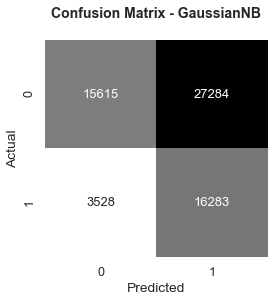



 Reporting for LogisticRegression:



,model_name,train_time,pred_time,acc_train,acc_test,precision_train,precision_test,pecall_train,recall_test
1,LogisticRegression,5.40,0.35,0.70,0.70,0.69,0.68,0.12,0.12



Classification Report for LogisticRegression :

               precision    recall  f1-score   support

           0       0.71      0.97      0.82     42899
           1       0.68      0.12      0.20     19811

    accuracy                           0.70     62710
   macro avg       0.69      0.55      0.51     62710
weighted avg       0.70      0.70      0.62     62710



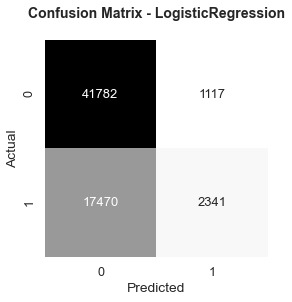



 Reporting for KNeighborsClassifier:



,model_name,train_time,pred_time,acc_train,acc_test,precision_train,precision_test,pecall_train,recall_test
1,LogisticRegression,5.40,0.35,0.70,0.70,0.69,0.68,0.12,0.12



Classification Report for KNeighborsClassifier :

               precision    recall  f1-score   support

           0       0.71      0.97      0.82     42899
           1       0.68      0.12      0.20     19811

    accuracy                           0.70     62710
   macro avg       0.69      0.55      0.51     62710
weighted avg       0.70      0.70      0.62     62710



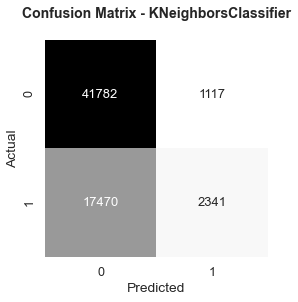



 Reporting for RandomForestClassifier:



,model_name,train_time,pred_time,acc_train,acc_test,precision_train,precision_test,pecall_train,recall_test
1,LogisticRegression,5.40,0.35,0.70,0.70,0.69,0.68,0.12,0.12



Classification Report for RandomForestClassifier :

               precision    recall  f1-score   support

           0       0.71      0.97      0.82     42899
           1       0.68      0.12      0.20     19811

    accuracy                           0.70     62710
   macro avg       0.69      0.55      0.51     62710
weighted avg       0.70      0.70      0.62     62710



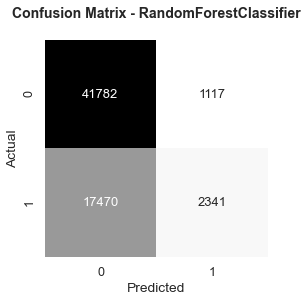



 Reporting for XGBClassifier:



,model_name,train_time,pred_time,acc_train,acc_test,precision_train,precision_test,pecall_train,recall_test
1,LogisticRegression,5.40,0.35,0.70,0.70,0.69,0.68,0.12,0.12



Classification Report for XGBClassifier :

               precision    recall  f1-score   support

           0       0.71      0.97      0.82     42899
           1       0.68      0.12      0.20     19811

    accuracy                           0.70     62710
   macro avg       0.69      0.55      0.51     62710
weighted avg       0.70      0.70      0.62     62710



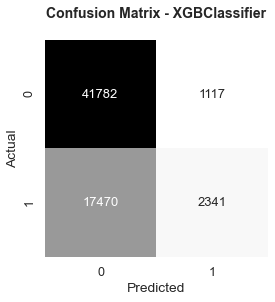

In [35]:
ml_reporting()

In [52]:
def ml_reporting_exp_figs():
    '''
    This function plots the resulting confusion matrix and exports it as .png-file
    '''
    df_res = pd.DataFrame(results_list)
    df_pred = pd.DataFrame(predicted_target_values_list)
    # Set up counter
    i = 0
    for results in results_list:
        # Plot confusion matrix as heatmap
        # Generate confusion matrix for individual model
        data_i = confusion_matrix(df_pred.iloc[i]['y_test'], df_pred.iloc[i]['y_pred_test'])
        df_cm_i = pd.DataFrame(data_i, columns = np.unique(df_pred.iloc[i]['y_test']), index = np.unique(df_pred.iloc[i]['y_test']))
        # Set up names within confusion matrix
        df_cm_i.index.name = 'Actual'
        df_cm_i.columns.name = 'Predicted'
        # Set up plot layout
        plt.figure(figsize = (4, 4))
        sns.set(font_scale=1.15) #for label size (x- & y-labels)
        # Set up plot
        sns.heatmap(df_cm_i, cmap='gray_r', annot=True, annot_kws={'size': 13}, cbar=False, fmt='1.0f') #annot_kws for setting up the font size of numbers
        # Set up title
        plt.title(('Confusion Matrix - {0}\n').format(results['model_name']), fontsize=(14), fontweight='bold')
        # Safe figure as .png
        plt.savefig(('confusion_matrix_{0}.png').format(results['model_name']), transparent=True, bbox_inches='tight', dpi=300)
        # Handling plot apperance
        plt.close()
        # Status
        print (('{0} exported.').format(results['model_name']))
        # Raise counter by 1
        i =+ 1

In [53]:
ml_reporting_exp_figs()

GaussianNB exported.
LogisticRegression exported.
KNeighborsClassifier exported.
RandomForestClassifier exported.
XGBClassifier exported.


In [54]:
def ml_reporting_export_tables():
    # Create data frames out of the results and predictions
    df_res = pd.DataFrame(results_list)
    df_pred = pd.DataFrame(predicted_target_values_list)
    # Copy data frames for export
    df_res_ex = df_res.copy()
    df_pred_ex = df_pred.copy()

    # Export results from custom report
    with pd.ExcelWriter('baseline_output_custom.xlsx') as writer:
        df_res_ex.to_excel(writer, sheet_name='individual_results')
        df_pred_ex.to_excel(writer, sheet_name='individual_predictions')

    # Export results from confusion matrices
    # Set up counter and list for data frames
    i = 0
    df_cm_list = []

    # Loop to write results into a list
    for results in results_list:
        # Generate confusion matrix as data frame
        df_cm = pd.DataFrame(classification_report(df_pred.iloc[i]['y_test'], df_pred.iloc[i]['y_pred_test'], output_dict=True)).transpose()
        df_cm_list.append(df_cm)
        # Status
        print (('{0} exported.').format(results['model_name']))
        # Raise counter by 1
        i =+ 1

    writer = pd.ExcelWriter('baseline_output_confusion_matrices.xlsx')
    i = 0
    for cm in df_cm_list:
        cm.to_excel(writer, sheet_name=f'confusion_matrices_{i}')
        i =+ 1

In [55]:
ml_reporting_export_tables()

GaussianNB exported.
LogisticRegression exported.
KNeighborsClassifier exported.
RandomForestClassifier exported.
XGBClassifier exported.
